#Performing Data Cleaning for Machine Learning with Python

___
## Jose Antonio Mora C15114
## Marcelo Delgado Mora C12510
## Felipe Mena Rodríguez C24721
___

Data cleaning is a critically important step in any machine learning project.

In tabular data, there are many different statistical analysis and data visualization techniques you can use to explore your data in order to identify data cleaning operations you may want to perform.

Before jumping to the sophisticated methods, there are some very basic data cleaning operations that you probably should perform on every single machine learning project. These are so basic that they are often overlooked by seasoned machine learning practitioners, yet are so critical that if skipped, models may break or report overly optimistic performance results.

In this tutorial, you will discover basic data cleaning you should always perform on your dataset.

After completing this tutorial, you will know:

* How to identify and remove column variables that only have a single value.
* How to identify and consider column variables with very few unique values.
* How to identify and remove rows that contain duplicate observations.

## Overview
1. Messy Datasets
2. Identify Columns That Contain a Single Value
3. Delete Columns That Contain a Single Value
4. Consider Columns That Have Very Few Values
5. Remove Columns That Have A Low Variance
6. Identify Rows that Contain Duplicate Data
7. Delete Rows that Contain Duplicate Data


##Messy Datasets

Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model.

Although critically important, data cleaning is not exciting, not does it involve fancy techniques. Just a good knowledge of the dataset.

There are many types of errors that exist in a dataset, although some of the simplest errors include columns that don’t contain much information and duplicated rows.

Before we dive into identifying and correcting messy data, let’s define some messy datasets.

We will use two datasets as the basis for this tutorial, the oil spill dataset and the iris flowers dataset.


##Oil Spill Dataset
The so-called “oil spill” dataset is a standard machine learning dataset.

The task involves predicting whether the patch contains an oil spill or not, e.g. from the illegal or accidental dumping of oil in the ocean, given a vector that describes the contents of a patch of a satellite image.

There are 937 cases. Each case is comprised of 48 numerical computer vision derived features, a patch number, and a class label.

The normal case is no oil spill assigned the class label of 0, whereas an oil spill is indicated by a class label of 1. There are 896 cases for no oil spill and 41 cases of an oil spill.

You can access the entire dataset here:
* [Oil Spill Dataset (oil-spill.csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv)
* [Oil Spill Dataset Description (oil-spill.names)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.names)

Review the contents of the file.

The first few lines of the file should look as follows:



```
1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780,0.19,214.7,0.21,0.26,0.49,0.1,0.4,99.59,32.19,1.84,0.16,0.2,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.2,-3.71,-0.18,2.19,0,2.19,310,16110,0,138.68,89,69,2850,1000,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
2,22325,79.11,841.03,180,55812500,51.11,1.21,61900,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.3,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0,0,0,0,704,40140,0,68.65,89,69,5750,11500,9593.48,1648.8,0.6,0,51572.04,65.73,6.26,0
3,115,1449.85,608.43,88,287500,40.42,7.34,3340,0.18,86.1,0.21,0.32,0.5,0.17,0.34,71.2,16.73,1.82,0.19,0.29,87.65,0,0.46,132.78,-0.01,3.78,0.7,4.79,-3.36,-0.23,1.95,0,1.95,29,1530,0.01,38.8,89,69,1400,250,150,45.13,9.33,1,31692.84,65.81,7.84,1
4,1201,1562.53,295.65,66,3002500,42.4,7.97,18030,0.19,166.5,0.21,0.26,0.48,0.1,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.2,0,2.2,183,10080,0,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
5,312,950.27,440.86,37,780000,41.43,7.03,3350,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0,2.19,45,2340,0,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
```



We can see that the first column contains integers for the patch number. We can also see that the computer vision derived features are real-valued with differing scales such as thousands in the second column and fractions in other columns.

This dataset contains columns with very few unique values that provides a good basis for data cleaning.

##Iris Flowers Dataset
The so-called “iris flowers” dataset is another standard machine learning dataset.

The dataset involves predicting the flower species given measurements of iris flowers in centimeters.

It is a multi-class classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable.

You can access the entire dataset here:
* [Iris Flowers Dataset (iris.csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv)
* [Iris Flowers Dataset Description (iris.names)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.names)

Review the contents of the file.

The first few lines of the file should look as follows:

```
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...
```

We can see that all four input variables are numeric and that the target class variable is a string representing the iris flower species.

This dataset contains duplicate rows that provides a good basis for data cleaning.

##Identify Columns That Contain a Single Value
Columns that have a single observation or value are probably useless for modeling.

These columns or predictors are referred to zero-variance predictors as if we measured the variance (average value from the mean), it would be zero.

Here, a single value means that each row for that column has the same value. For example, the column X1 has the value 1.0 for all rows in the dataset:

```
X1
1.0
1.0
1.0
1.0
1.0
...
```

Columns that have a single value for all rows do not contain any information for modeling.

Depending on the choice of data preparation and modeling algorithms, variables with a single value can also cause errors or unexpected results.

You can detect rows that have this property [using the unique() NumPy function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html) that will report the number of unique values in each column.

The example below loads the oil-spill classification dataset that contains 50 variables and summarizes the number of unique values for each column.

In [1]:
# summarize the number of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
 print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


Running the example loads the dataset directly from the URL and prints the number of unique values for each column.

We can see that column index 22 only has a single value and should be removed.

```
22 1
```

A simpler approach is to use the [nunique() Pandas function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) that does the hard work for you.

Below is the same example using the Pandas function.



In [2]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


##Delete Columns That Contain a Single Value
Variables or columns that have a single value should probably be removed from your dataset.

Columns are relatively easy to remove from a NumPy array or Pandas DataFrame.

One approach is to record all columns that have a single unique value, then delete them from the Pandas DataFrame by calling the [drop() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

The complete example is listed below.

In [3]:
# delete columns with a single unique value
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


Running the example first loads the dataset and reports the number of rows and columns.

The number of unique values for each column is calculated, and those columns that have a single unique value are identified. In this case, column index 22.

The identified columns are then removed from the DataFrame, and the number of rows and columns in the DataFrame are reported to confirm the change.

##Consider Columns That Have Very Few Values
In the previous section, we saw that some columns in the example dataset had very few unique values.

For example, there were columns that only had 2, 4, and 9 unique values. This might make sense for ordinal or categorical variables. In this case, the dataset only contains numerical variables. As such, only having 2, 4, or 9 unique numerical values in a column might be surprising.

We can refer to these columns or predictors as near-zero variance predictors, as their variance is not zero, but a very small number close to zero.

These columns may or may not contribute to the skill of a model. We can’t assume that they are useless to modeling.

Depending on the choice of data preparation and modeling algorithms, variables with very few numerical values can also cause errors or unexpected results. For example, I have seen them cause errors when using power transforms for data preparation and when fitting linear models that assume a “sensible” data probability distribution.

To help highlight columns of this type, you can calculate the number of unique values for each variable as a percentage of the total number of rows in the dataset.

Let’s do this manually using NumPy. The complete example is listed below.

In [4]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
 num = len(unique(data[:, i]))
 percentage = float(num) / data.shape[0] * 100
 print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


Running the example reports the column index and the number of unique values for each column, followed by the percentage of unique values out of all rows in the dataset.

Here, we can see that some columns have a very low percentage of unique values, such as below 1 percent.

We can update the example to only summarize those variables that have unique values that are less than 1 percent of the number of rows.

In [5]:
# summarize the percentage of unique values for each column using numpy
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
data = loadtxt(urlopen(path), delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
 num = len(unique(data[:, i]))
 percentage = float(num) / data.shape[0] * 100
 if percentage < 1:
   print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


Running the example, we can see that 11 of the 50 variables have numerical variables that have unique values that are less than 1 percent of the number of rows.

This does not mean that these rows and columns should be deleted, but they require further attention.

For example:

* Perhaps the unique values can be encoded as ordinal values?
* Perhaps the unique values can be encoded as categorical values?
* Perhaps compare model skill with each variable removed from the dataset?

For example, if we wanted to delete all 11 columns with unique values less than 1 percent of rows; the example below demonstrates this.

In [6]:
# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


Running the example first loads the dataset and reports the number of rows and columns.

The number of unique values for each column is calculated, and those columns that have a number of unique values less than 1 percent of the rows are identified. In this case, 11 columns.

The identified columns are then removed from the DataFrame, and the number of rows and columns in the DataFrame are reported to confirm the change.

##Remove Columns That Have A Low Variance
Another approach to the problem of removing columns with few unique values is to consider the variance of the column.

Recall that the [variance](https://en.wikipedia.org/wiki/Variance) is a statistic calculated on a variable as the average squared difference of values on the sample from the mean.

The variance can be used as a filter for identifying columns to removed from the dataset. A column that has a single value has a variance of 0.0, and a column that has very few unique values will have a small variance value.

The [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) class from the scikit-learn library supports this as a type of feature selection. An instance of the class can be created specify the “threshold” argument, which defaults to 0.0 to remove columns with a single value.

It can then be fit and applied to a dataset by calling the fit_transform() function to create a transformed version of the dataset where the columns that have a variance lower than the threshold have been removed automatically.

```
...
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
```
We can demonstrate this on the oil spill dataset as follows:

In [7]:
# example of apply the variance threshold
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


Running the example first loads the dataset, then applies the transform to remove all columns with a variance of 0.0.

The shape of the dataset is reported before and after the transform, and we can see that the single column where all values are the same has been removed.

We can expand this example and see what happens when we use different thresholds.

We can define a sequence of thresholds from 0.0 to 0.5 with a step size of 0.05, e.g. 0.0, 0.05, 0.1, etc.


```
...
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
```
We can then report the number of features in the transformed dataset for each given threshold.


```
...
# apply transform with each threshold
results = list()
for t in thresholds:
 # define the transform
 transform = VarianceThreshold(threshold=t)
 # transform the input data
 X_sel = transform.fit_transform(X)
 # determine the number of input features
 n_features = X_sel.shape[1]
 print('>Threshold=%.2f, Features=%d' % (t, n_features))
 # store the result
 results.append(n_features)
```

Finally, we can plot the results.

Tying this together, the complete example of comparing variance threshold to the number of selected features is listed below.



(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


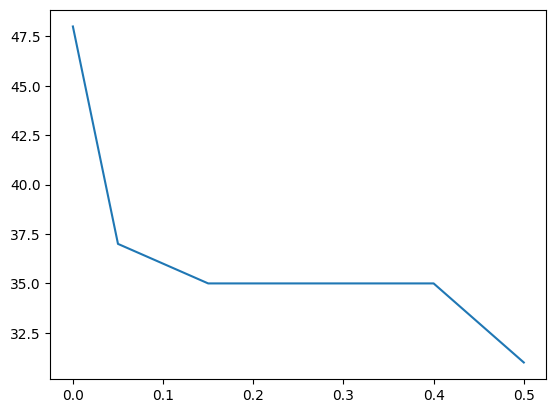

In [8]:
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# load the dataset
df = read_csv(path, header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
 # define the transform
 transform = VarianceThreshold(threshold=t)
 # transform the input data
 X_sel = transform.fit_transform(X)
 # determine the number of input features
 n_features = X_sel.shape[1]
 print('>Threshold=%.2f, Features=%d' % (t, n_features))
 # store the result
 results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

Running the example first loads the data and confirms that the raw dataset has 49 columns.

Next, the VarianceThreshold is applied to the raw dataset with values from 0.0 to 0.5 and the number of remaining features after the transform is applied are reported.

We can see that the number of features in the dataset quickly drops from 49 in the unchanged data down to 35 with a threshold of 0.15. It later drops to 31 (18 columns deleted) with a threshold of 0.5.

A line plot is then created showing the relationship between the threshold and the number of features in the transformed dataset.

We can see that even with a small threshold between 0.15 and 0.4, that a large number of features (14) are removed immediately.

##Identify Rows That Contain Duplicate Data

Rows that have identical data are probably useless, if not dangerously misleading during model evaluation.

Here, a duplicate row is a row where each value in each column for that row appears in identically the same order (same column values) in another row.

From a probabilistic perspective, you can think of duplicate data as adjusting the priors for a class label or data distribution. This may help an algorithm like [Naive Bayes](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/) if you wish to purposefully bias the priors. Typically, this is not the case and machine learning algorithms will perform better by identifying and removing rows with duplicate data.

From an algorithm evaluation perspective, duplicate rows will result in misleading performance. For example, if you are using a train/test split or [k-fold cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/), then it is possible for a duplicate row or rows to appear in both train and test datasets and any evaluation of the model on these rows will be (or should be) correct. This will result in an optimistically biased estimate of performance on unseen data.

If you think this is not the case for your dataset or chosen model, design a controlled experiment to test it. This could be achieved by evaluating model skill with the raw dataset and the dataset with duplicates removed and comparing performance. Another experiment might involve augmenting the dataset with different numbers of randomly selected duplicate examples.

The pandas function duplicated() will report whether a given row is duplicated or not. All rows are marked as either False to indicate that it is not a duplicate or True to indicate that it is a duplicate. If there are duplicates, the first occurrence of the row is marked False (by default), as we might expect.

The example below checks for duplicates.

In [9]:
# locate rows of duplicate data
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


Running the example first loads the dataset, then calculates row duplicates.

First, the presence of any duplicate rows is reported, and in this case, we can see that there are duplicates (True).

Then all duplicate rows are reported. In this case, we can see that three duplicate rows that were identified are printed.

##Delete Rows That Contain Duplicate Data
Rows of duplicate data should probably be deleted from your dataset prior to modeling.

There are many ways to achieve this, although Pandas provides the [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) function that achieves exactly this.

The example below demonstrates deleting duplicate rows from a dataset.

In [10]:
# delete rows of duplicate data from the dataset
from pandas import read_csv
# define the location of the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# load the dataset
df = read_csv(path, header=None)
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)


Running the example first loads the dataset and reports the number of rows and columns.

Next, the rows of duplicated data are identified and removed from the DataFrame. Then the shape of the DataFrame is reported to confirm the change.

#Laboratorio

Para el laboratorio deben buscar, combinar y limpiar dos datasets relacionados utilizando Python en Google Colab, aplicando técnicas comunes de preprocesamiento de datos.

##Datasets Sugeridos

###Sugerecias (Pueden buscar otros)

Lo mejor es encontrar dos datasets que compartan alguna columna o concepto común que permita unirlos (merge). Buscar en plataformas como Kaggle, UCI Machine Learning Repository, o alguna otra similar.

#### Sugerencia A: Películas y Calificaciones

- Dataset 1: Metadatos de películas (TMDB 5000 Movie Dataset en Kaggle).
 - Contiene: título, ID, géneros, presupuesto, ingresos, fecha de estreno, etc
- Dataset 2: Calificaciones de usuarios para películas (The Movies Dataset o similar en Kaggle).
 - Contiene: ID de usuario, ID de película, calificación, timestamp.

#### Sugerencia B: Productos y Ventas de E-commerce

- Dataset 1: Información de productos (Olist E-commerce Dataset en Kaggle).
 - Contiene: ID de producto, categoría, dimensiones, peso.
- Dataset 2: Información de ítems vendidos.
 - Contiene: ID de orden, ID de ítem, ID de producto, ID de vendedor, precio, costo de envío.

#### Sugerencia C: Datos Demográficos y Económicos por Región

- Dataset 1: Datos demográficos (población, edad, etc) por país/estado/ciudad (datos del Banco Mundial, censos nacionales).
- Dataset 2: Indicadores económicos (PIB per cápita, tasa de desempleo, etc) para las mismas regiones.

Parte del ejercicio es encontrar y evaluar datasets adecuados.

## Preparación y Carga

Encuentren tus dos datasets elegidos y cargar cada dataset en un DataFrame de distinto.

## Exploración Inicial (Antes de Combinar)

Realiza una exploración básica para entender la estructura y contenido de ambos datasets por aparte.

## Combinación de Datasets

Determinar qué columna usaran para combinar los DataFrames. Verificquen si los nombres de las columnas clave son iguales y si los datos de ambas columnas coinciden, si no, renombrar y/o cambiar alguna de las columnas.
Si la clave es texto, puede ser necesario limpiarla antes de unir para maximizar coincidencias.

## Limpieza del Dataset Combinado

Aquí deben aplicar las técnicas vistas en el notebook, pero pueden elegir otras que sean mejores para el tipo de dataset que encontraron o el tipo de problema que presente.

## Verificación Final

Ejecutar de nuevo el análisis exploratorio sobre el dataset limpio.
Verificar que los problemas identificados se hayan resuelto.
Realizar algunas visualizaciones básicas para entender la distribución de los datos limpios.

##Solución
En este caso se utilizarán los datasets recomendados en el punto 1, si bien es cierto estos al estar en kaggle se encuentran bastante limpios, se buscara tener al final un dataset que contemple los ratings encontrados en el dataset de ratings de diferentes peliculas encontradas en el dataset de metadatos de peliculas para realizar comparaciónes y recomendaciones en un nuevo dataset unido.

In [17]:
#Preparación y carga
from google.colab import files
import pandas as pd
uploaded = files.upload()

meta_df = pd.read_csv('tmdb_5000_movies.csv')
rating_df = pd.read_csv('ratings_small.csv')


Saving tmdb_5000_movies.csv to tmdb_5000_movies (1).csv
Saving ratings_small.csv to ratings_small (1).csv


In [18]:
#Analisis Exploratorio inicial dataset metadatos
meta_df.info()
print("Forma del dataset", meta_df.shape)
print()
print("Valores nulos\n",meta_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [19]:
#Analisis Exploratorio inicial dataset ratings
rating_df.info()
print("Forma del dataset", rating_df.shape)
print()
print("Valores nulos\n",rating_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
Forma del dataset (100004, 4)

Valores nulos
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [20]:
#Combinación de datasets
print(rating_df.columns)
print(meta_df.columns)
#Tomamos Id como columna a combinar
meta_df = meta_df.rename(columns={'id': 'movieId'})
print(meta_df.columns)

merged_df = pd.merge(rating_df, meta_df, on='movieId', how='inner')
merged_df.shape

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['budget', 'genres', 'homepage', 'movieId', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


(18571, 23)

In [21]:
merged_df.head(10)

,userId,movieId,rating,timestamp,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,1,2105,4.0,1260759139,11000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,"[{""id"": 3687, ""name"": ""graduation""}, {""id"": 61...",en,American Pie,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-07-09,235483004,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,There's nothing like your first piece.,American Pie,6.4,2296
1,1,2294,2.0,1260759108,22000000,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,"[{""id"": 886, ""name"": ""film making""}, {""id"": 16...",en,Jay and Silent Bob Strike Back,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2001-08-22,33788161,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hollywood had it coming,Jay and Silent Bob Strike Back,6.4,480
2,2,62,3.0,835355749,10500000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,"[{""id"": 305, ""name"": ""moon""}, {""id"": 306, ""nam...",en,2001: A Space Odyssey,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1968-04-10,68700000,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An epic drama of adventure and exploration,2001: A Space Odyssey,7.9,2998
3,2,153,4.0,835355441,4000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,"[{""id"": 213, ""name"": ""upper class""}, {""id"": 92...",en,Lost in Translation,...,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2003-08-31,119723856,102.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Everyone wants to be found.,Lost in Translation,7.3,1895
4,2,161,3.0,835355493,85000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",http://www.warnerbros.co.uk/movies/oceans-eleven,"[{""id"": 378, ""name"": ""prison""}, {""id"": 3430, ""...",en,Ocean's Eleven,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2001-12-07,450717150,116.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,Are you in or out?,Ocean's Eleven,7.2,3783
5,2,165,3.0,835355441,40000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",http://www.backtothefuture.com/movies/backtoth...,"[{""id"": 390, ""name"": ""skateboarding""}, {""id"": ...",en,Back to the Future Part II,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1989-11-20,332000000,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Roads? Where we're going, we don't need roads!",Back to the Future Part II,7.4,3829
6,2,168,3.0,835355710,24000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Star Trek IV: The Voyage Home,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1986-11-25,133000000,119.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The key to saving the future can only be found...,Star Trek IV: The Voyage Home,6.9,477
7,2,186,3.0,835355664,27000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,"[{""id"": 441, ""name"": ""assassination""}, {""id"": ...",en,Lucky Number Slevin,...,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2006-02-24,56308881,110.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Wrong Time. Wrong Place. Wrong Number.,Lucky Number Slevin,7.4,1323
8,2,223,1.0,835355749,1288000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",NaN,"[{""id"": 660, ""name"": ""monte carlo""}, {""id"": 81...",en,Rebecca,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1940-04-12,6000000,130.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The shadow of this woman darkened their love.,Rebecca,7.7,336
9,2,235,3.0,835355664,8000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,"[{""id"": 818, ""name"": ""ba

In [22]:
#Limpieza

counts = merged_df.nunique()
print(counts)
# record columns to delete
to_del = counts[counts == 1].index.tolist()
print(to_del)
# drop useless columns
print(merged_df.shape)
merged_df.drop(to_del, axis=1, inplace=True)
print(merged_df.shape)


userId                    670
movieId                   857
rating                     10
timestamp               15887
budget                    209
genres                    394
homepage                  317
keywords                  850
original_language          16
original_title            856
overview                  857
popularity                857
production_companies      733
production_countries      137
release_date              790
revenue                   765
runtime                   112
spoken_languages          200
status                      1
tagline                   789
title                     856
vote_average               47
vote_count                698
dtype: int64
['status']
(18571, 23)
(18571, 22)


In [23]:
counts = merged_df.nunique()
# record columns to delete
to_del =  counts[(counts/merged_df.shape[0]*100) < 1].index.tolist()
# Look at some values
for col in to_del:
    print(f"\nColumn: {col}")
    print(merged_df[col].value_counts(dropna=False).head())
# Se puede ver que algunas de las columnas de varianca menor a 1% son aún importantes para el dataset, podemos eliminar vote_average ya que es redundante con Rating valor que obtenemos del dataset de ratings.
merged_df.drop(columns=["vote_average", "vote_count"], axis=1, inplace=True)
print(merged_df.shape)


Column: rating
rating
4.0    5450
3.0    4471
5.0    2986
3.5    1494
2.0    1404
Name: count, dtype: int64

Column: original_language
original_language
en    16967
fr      326
de      321
ru      310
hi      277
Name: count, dtype: int64

Column: production_countries
production_countries
[{"iso_3166_1": "US", "name": "United States of America"}]                                                                                             11293
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]                                              1372
[{"iso_3166_1": "DE", "name": "Germany"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                      602
[{"iso_3166_1": "GB", "name": "United Kingdom"}]                                                                                                         436
[{"iso_3166_1": "DE", "name": "Germany"}, {"iso_3166_1": "GB", "name": "United Ki

In [24]:
#Podemos ver que no hay duplicates
merged_df.shape
merged_df.drop_duplicates(inplace=True)
merged_df.shape

(18571, 20)

Verificación Final

In [25]:
merged_df.info()
print("Forma del dataset", merged_df.shape)
print()
print("Valores nulos\n",merged_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18571 entries, 0 to 18570
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userId                18571 non-null  int64  
 1   movieId               18571 non-null  int64  
 2   rating                18571 non-null  float64
 3   timestamp             18571 non-null  int64  
 4   budget                18571 non-null  int64  
 5   genres                18571 non-null  object 
 6   homepage              7246 non-null   object 
 7   keywords              18571 non-null  object 
 8   original_language     18571 non-null  object 
 9   original_title        18571 non-null  object 
 10  overview              18571 non-null  object 
 11  popularity            18571 non-null  float64
 12  production_companies  18571 non-null  object 
 13  production_countries  18571 non-null  object 
 14  release_date          18571 non-null  object 
 15  revenue            

Se puede ver que ahora tenemos un dataset conjunto que muestra los ratings para las peliculas del dataset de metadatos de peliculas, sin ningún problema de datos en las "features" importantes.

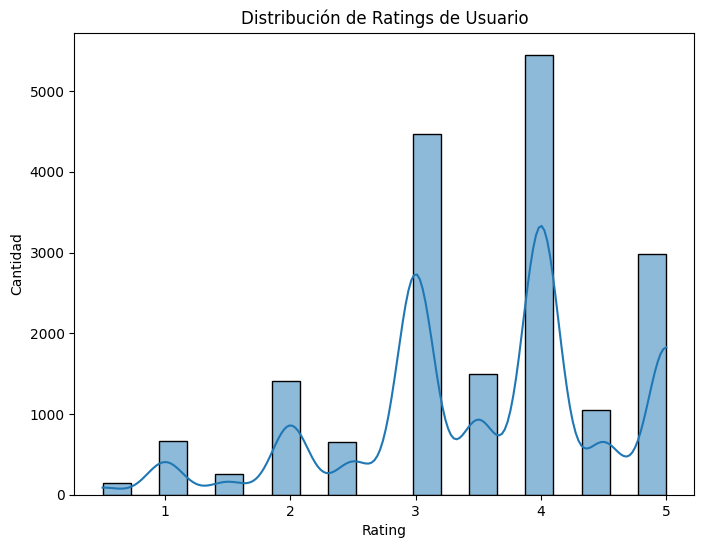

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(merged_df['rating'], bins=20, kde=True)
plt.title('Distribución de Ratings de Usuario')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

Con el fin de demostrar la utilidad de la combinación de los datasets se muestra la correlación de de presupuesto con el rating de las peliculas.

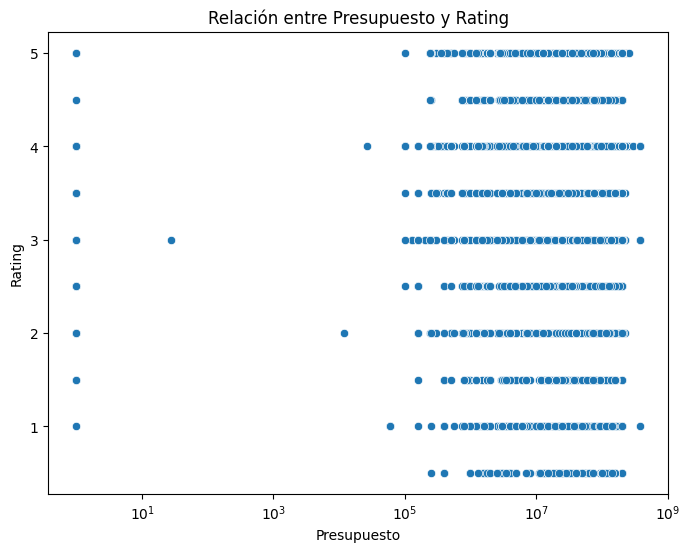

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='budget', y='rating')
plt.title('Relación entre Presupuesto y Rating')
plt.xlabel('Presupuesto')
plt.ylabel('Rating')
plt.xscale('log')  # Escala logarítmica porque el presupuesto tiene valores muy grandes
plt.show()

#Fuentes

* Este contenido fue tomado del tutorial ["How to Perform Data Cleaning for Machine Learning with Python"](https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/) por Jason Brownlee en [https://machinelearningmastery.com](https://machinelearningmastery.com)

* Adaptaciones menores hechas para nuestro curso.